
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.uniform(0,1,(1000,2))
eps = np.random.normal(0,1,1000)


y = 3*X[:,0] + 5*X[:,1] + 3 + eps
y = y.reshape(-1,1)

X = np.column_stack([np.ones(X.shape[0]),X])


X.shape, y.shape

((1000, 3), (1000, 1))

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

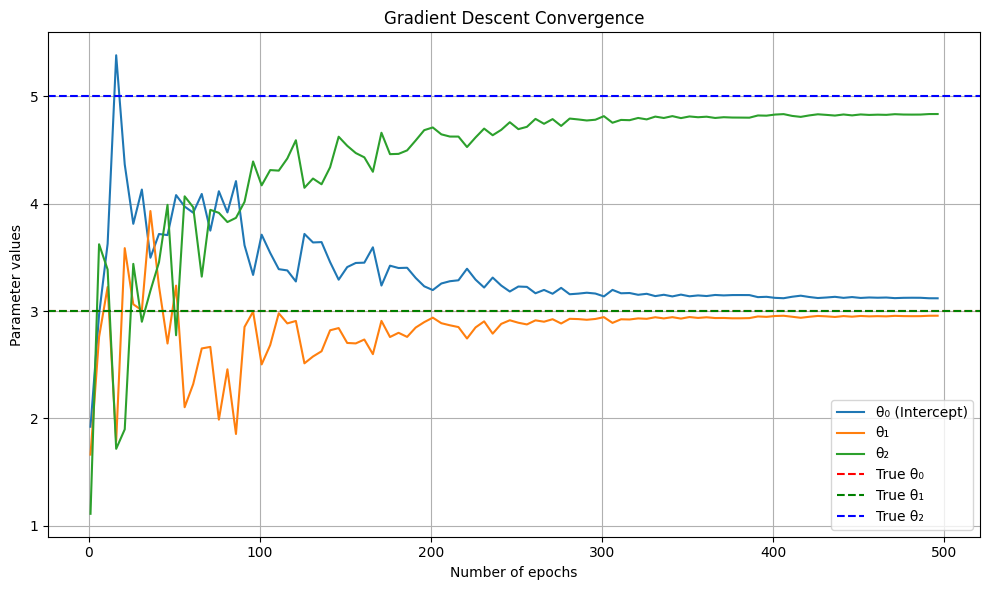

Final theta values (after 496 iterations):
θ₀ = 3.1184, True θ₀ = 3
θ₁ = 2.9561, True θ₁ = 3
θ₂ = 4.8351, True θ₂ = 5


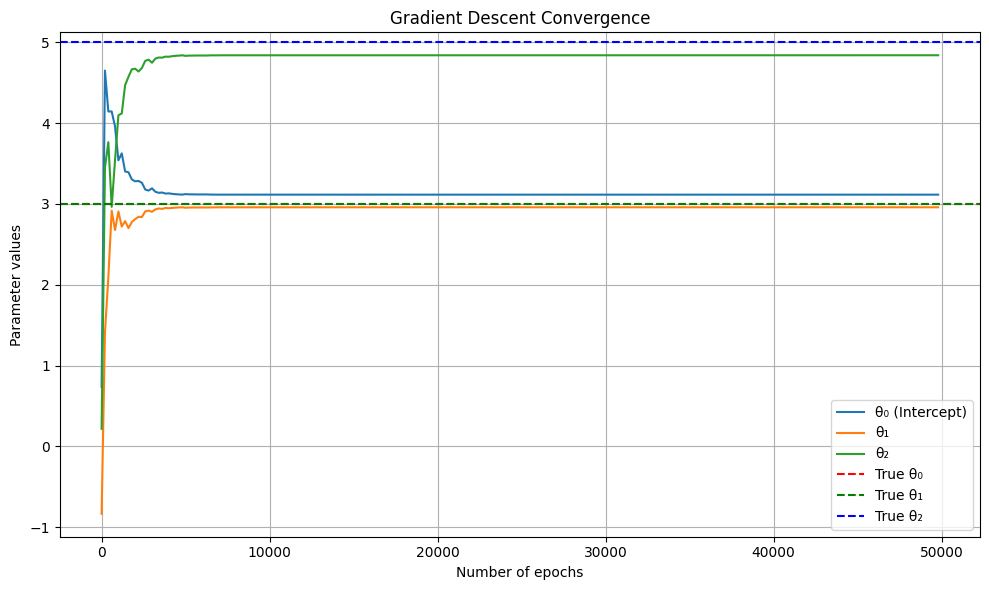

Final theta values (after 49801 iterations):
θ₀ = 3.1149, True θ₀ = 3
θ₁ = 2.9586, True θ₁ = 3
θ₂ = 4.8392, True θ₂ = 5


In [39]:
def gradient_descent(X, y, learning_rate = .1, iterations = 500):
    m = len(X)

    theta = np.random.randn(X.shape[1],1)
    #print(f"Initialize theta with randomized\n {theta}")

    for _ in range(iterations):
        gradient = (2/m) *X.T@(X@theta-y)
        theta -= learning_rate*gradient

    return theta


steps1 = range(1,501,5)
steps2 = range(1,50001,200)
thetas1 = [gradient_descent(X,y,iterations=i).reshape(-1) for i in steps1]
thetas2 = [gradient_descent(X,y,learning_rate=0.01,iterations=i).reshape(-1) for i in steps2]

thetas1 = np.array(thetas1)
thetas2 = np.array(thetas2)

thetas1
thetas2


def plot_gradient_descent(steps, thetas):
    plt.figure(figsize=(10, 6)) # gpt plot lol
    plt.plot(steps, thetas[:, 0], label='θ₀ (Intercept)')
    plt.plot(steps, thetas[:, 1], label='θ₁')
    plt.plot(steps, thetas[:, 2], label='θ₂')
    plt.axhline(y=3, color='r', linestyle='--', label='True θ₀')
    plt.axhline(y=3, color='g', linestyle='--', label='True θ₁')
    plt.axhline(y=5, color='b', linestyle='--', label='True θ₂')
    plt.xlabel('Number of epochs')
    plt.ylabel('Parameter values')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Let's also see the final values of our parameters
    print(f"Final theta values (after {steps[-1]} iterations):")
    print(f"θ₀ = {thetas[-1, 0]:.4f}, True θ₀ = 3")
    print(f"θ₁ = {thetas[-1, 1]:.4f}, True θ₁ = 3")
    print(f"θ₂ = {thetas[-1, 2]:.4f}, True θ₂ = 5")

plot_gradient_descent(steps1, thetas1)
plot_gradient_descent(steps2, thetas2)

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

In [43]:
epochs = 50
t0, t1 = 5, 50


def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X[random_index:random_index+1] # this gives an extra dimension on the matrix
        y_i = y[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients


theta

plot_gradient_descent(epochs,theta)

ValueError: shapes (1,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---